In [1]:
library(Seurat)
library(ggplot2)
library(dplyr)
library(stringr)
library(Sierra)
library(presto)
library(ggplot2)
library(msigdbr)
library(fgsea)
library(Seurat)
library(tidyverse)
setwd('/data/APAproject/post_qual/data/Nagy_mdd/')

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
"replacing previous import 'GenomicRanges::union' by 'dplyr::union' when loading 'Sierra'"
Warning message:
"replacing previous import 'GenomicRanges::intersect' by 'dplyr::intersect' when loading 'Sierra'"
Warning message:
"replacing previous import 'GenomicRanges::setdiff' by 'dplyr::setdiff' when loading 'Sierra'"
Warning message:
"replacing previous import 'Gviz::tail' by 'utils::tail' when loading 'Sierra'"
Warning message:
"replacing previous import 'Gviz::head' by 'utils::head' when loading 'Sierra'"
Loading required package: Rcpp

Loading required package: data.table


Attaching package: 'data.table'


The following objects are masked from 'package:dplyr':

    between, first, last


Registered S3 method overwritten by 'cli':
  method     f

In [11]:
## correct the barcode and gene name file formats
# bc = read.table('GSE144136_CellNames.csv', sep=',', header = T)
# bc = data.frame(bc$x)
# write.table(bc, file='barcodes.tsv', quote = F, row.names = F, col.names = F)

In [12]:
## correct the barcode and gene name file formats
# bc = read.table('GSE144136_GeneNames.csv', sep=',', header = T)
# bc = data.frame(bc$x)
# write.table(bc, file='genes.tsv', quote = F, row.names = F, col.names = F)

In [2]:
ge_so <- Read10X(data.dir = "count_matrices/mtx/", gene.column=1)
ge_so = CreateSeuratObject(counts = ge_so)
ge_so

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"


An object of class Seurat 
30062 features across 78886 samples within 1 assay 
Active assay: RNA (30062 features, 0 variable features)

In [5]:
ge_so@assays$RNA@

   [[ suppressing 32 column names 'Ex_10_L2_4.3_Control_B3_AAACCTGAGGTAGCCA', 'Inhib_5.3_Control_B3_AAACCTGCAAACTGTC', 'Ex_10_L2_4.3_Control_B3_AAACCTGCAACAACCT' ... ]]

   [[ suppressing 32 column names 'Ex_10_L2_4.3_Control_B3_AAACCTGAGGTAGCCA', 'Inhib_5.3_Control_B3_AAACCTGCAAACTGTC', 'Ex_10_L2_4.3_Control_B3_AAACCTGCAACAACCT' ... ]]

   [[ suppressing 32 column names 'Ex_10_L2_4.3_Control_B3_AAACCTGAGGTAGCCA', 'Inhib_5.3_Control_B3_AAACCTGCAAACTGTC', 'Ex_10_L2_4.3_Control_B3_AAACCTGCAACAACCT' ... ]]



30062 x 78886 sparse Matrix of class "dgCMatrix"
                                                                                             
RP11-34P13.3  RP11-34P13.3         . . .  . . . . . . . . . . . . . . . . . . . . . . . . . .
RP11-34P13.7  RP11-34P13.7         . . .  . . . . . . . . . . . . . . . . . . . . . . . . . .
RP11-34P13.14  RP11-34P13.14       . . .  . . . . . . . . . . . . . . . . . . . . . . . . . .
FO538757.3  FO538757.3             . . .  . . . . . . . . . . . . . . . . . . . . . . . . . .
FO538757.2  FO538757.2             1 1 1  . . . 1 1 . . . 1 . 1 . . 2 . 2 1 . . . . 2 . . . 2
AP006222.2  AP006222.2             . . .  . . . . . . . . . . . . . . . . . . . . . . . . . .
RP5-857K21.15  RP5-857K21.15       . . .  . . . . . . . . . . . . . . . . . . . . . . . . . .
RP4-669L17.2  RP4-669L17.2         . . .  . . . . . . . . . . . . . . . . . . . . . . . . . .
RP4-669L17.10  RP4-669L17.10       . . .  . . . . . . . . . . . . . . . . . . . . . . . . . .
RP5-857K21.

In [84]:
## make the metadata yourself :/ ##
info <- data.frame('cellname'= Cells(ge_so))
info$cellname
## you know what? do this part with the pyhton in generalBS part

cellname
<chr>
Ex_10_L2_4.3_Control_B3_AAACCTGAGGTAGCCA
Inhib_5.3_Control_B3_AAACCTGCAAACTGTC
Ex_10_L2_4.3_Control_B3_AAACCTGCAACAACCT
Ex_8_L5_6.3_Control_B3_AAACCTGGTCCGAACC
Inhib_2_VIP.3_Control_B3_AAACCTGGTCGTGGCT
Mix_2.3_Control_B3_AAACGGGAGGAACTGC
Oligos_3.3_Control_B3_AAACGGGAGTGGTAGC
Ex_7_L4_6.3_Control_B3_AAACGGGAGTGTGAAT
Astros_3.3_Control_B3_AAACGGGCATCCAACA


In [40]:
library(stringr)
tst <- str_split('Ex_10_L2_4.3_Control_B3_AAACCTGAGGTAGCCA', "\\.", n = Inf, simplify = T)
tst[[1]]

[1] "Ex_10_L2_4"

In [85]:
info[['batch']] = 'non'
info[['batchCond']] = 'non'
info[['cluster']] = 'non'
info[['barcode']] = 'non'

In [86]:
for (i in 1:nrow(info)){
    str <- as.character(info[i,'cellname'])
    str_sp <- str_split(str, "_", n = Inf, simplify = T)
    barcode <- str_sp[[length(str_sp)]]
    batch <- str_sp[[length(str_sp)-1]]
    batchCond <- str_sp[[length(str_sp)-2]]
    str_sp2 <- str_split(str, "\\.", n = Inf, simplify = T)
    cluster <- str_sp2[[1]]
    info[i,'batch'] <- batch
    info[i,'batchCond'] <- batchCond
    info[i,'cluster'] <- cluster
    info[i,'barcode'] <- barcode
}

In [97]:
info

cellname,batch,batchCond,cluster,barcode,cellType
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Ex_10_L2_4.3_Control_B3_AAACCTGAGGTAGCCA,B3,Control,Ex_10_L2_4,AAACCTGAGGTAGCCA,K
Inhib_5.3_Control_B3_AAACCTGCAAACTGTC,B3,Control,Inhib_5,AAACCTGCAAACTGTC,K
Ex_10_L2_4.3_Control_B3_AAACCTGCAACAACCT,B3,Control,Ex_10_L2_4,AAACCTGCAACAACCT,K
Ex_8_L5_6.3_Control_B3_AAACCTGGTCCGAACC,B3,Control,Ex_8_L5_6,AAACCTGGTCCGAACC,K
Inhib_2_VIP.3_Control_B3_AAACCTGGTCGTGGCT,B3,Control,Inhib_2_VIP,AAACCTGGTCGTGGCT,K
Mix_2.3_Control_B3_AAACGGGAGGAACTGC,B3,Control,Mix_2,AAACGGGAGGAACTGC,K
Oligos_3.3_Control_B3_AAACGGGAGTGGTAGC,B3,Control,Oligos_3,AAACGGGAGTGGTAGC,K
Ex_7_L4_6.3_Control_B3_AAACGGGAGTGTGAAT,B3,Control,Ex_7_L4_6,AAACGGGAGTGTGAAT,K
Astros_3.3_Control_B3_AAACGGGCATCCAACA,B3,Control,Astros_3,AAACGGGCATCCAACA,Astrocyte


In [54]:
table(info['batch'])


   B1    B2    B3    B4    B5    B6 
 5371  4376 15011 20296 17267 16565 

In [94]:
unique(info['cluster'])

,cluster
,<chr>
1,Ex_10_L2_4
2,Inhib_5
4,Ex_8_L5_6
5,Inhib_2_VIP
6,Mix_2
7,Oligos_3
8,Ex_7_L4_6
9,Astros_3
10,Ex_5_L5


cellname,batch,batchCond,cluster,barcode,cellType
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Ex_10_L2_4.3_Control_B3_AAACCTGAGGTAGCCA,B3,Control,Ex_10_L2_4,AAACCTGAGGTAGCCA,K
Inhib_5.3_Control_B3_AAACCTGCAAACTGTC,B3,Control,Inhib_5,AAACCTGCAAACTGTC,K
Ex_10_L2_4.3_Control_B3_AAACCTGCAACAACCT,B3,Control,Ex_10_L2_4,AAACCTGCAACAACCT,K
Ex_8_L5_6.3_Control_B3_AAACCTGGTCCGAACC,B3,Control,Ex_8_L5_6,AAACCTGGTCCGAACC,K
Inhib_2_VIP.3_Control_B3_AAACCTGGTCGTGGCT,B3,Control,Inhib_2_VIP,AAACCTGGTCGTGGCT,K
Mix_2.3_Control_B3_AAACGGGAGGAACTGC,B3,Control,Mix_2,AAACGGGAGGAACTGC,K
Oligos_3.3_Control_B3_AAACGGGAGTGGTAGC,B3,Control,Oligos_3,AAACGGGAGTGGTAGC,K
Ex_7_L4_6.3_Control_B3_AAACGGGAGTGTGAAT,B3,Control,Ex_7_L4_6,AAACGGGAGTGTGAAT,K
Astros_3.3_Control_B3_AAACGGGCATCCAACA,B3,Control,Astros_3,AAACGGGCATCCAACA,Astrocyte


In [98]:
tstinfo <- info[info['cluster']=='non',]
tstinfo

,cellname,batch,batchCond,cluster,barcode,cellType
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
40465,Ex_3_L4_5.1_Suicide_B5_AAGACCTTCCAATGGT,non,non,non,non,K
40466,Ex_3_L4_5.1_Suicide_B5_AAGACCTTCCTGCAGG,non,non,non,non,K
40467,Ex_3_L4_5.1_Suicide_B5_AAGCCGCAGGACGAAA,non,non,non,non,K
40468,Mix_2.1_Suicide_B5_AAGCCGCAGGTGCAAC,non,non,non,non,K
40469,OPCs_1.1_Suicide_B5_AAGCCGCGTTCAGACT,non,non,non,non,K
40470,Ex_6_L4_6.1_Suicide_B5_AAGCCGCTCAGCGATT,non,non,non,non,K
40471,Ex_6_L4_6.1_Suicide_B5_AAGCCGCTCCGGGTGT,non,non,non,non,K
40472,Ex_2_L5.1_Suicide_B5_AAGCCGCTCCTTGCCA,non,non,non,non,K
40473,Inhib_6_SST.1_Suicide_B5_AAGGAGCAGCGTGTCC,non,non,non,non,K


In [99]:
for (i in 1:nrow(tstinfo)){
    str <- as.character(tstinfo[i,'cellname'])
    str_sp <- str_split(str, "_", n = Inf, simplify = T)
    barcode <- str_sp[[length(str_sp)]]
    batch <- str_sp[[length(str_sp)-1]]
    batchCond <- str_sp[[length(str_sp)-2]]
    str_sp2 <- str_split(str, "\\.", n = Inf, simplify = T)
    cluster <- str_sp2[[1]]
    tstinfo[i,'batch'] <- batch
    tstinfo[i,'batchCond'] <- batchCond
    tstinfo[i,'cluster'] <- cluster
    tstinfo[i,'barcode'] <- barcode
}
tstinfo

,cellname,batch,batchCond,cluster,barcode,cellType
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
40465,Ex_3_L4_5.1_Suicide_B5_AAGACCTTCCAATGGT,B5,Suicide,Ex_3_L4_5,AAGACCTTCCAATGGT,K
40466,Ex_3_L4_5.1_Suicide_B5_AAGACCTTCCTGCAGG,B5,Suicide,Ex_3_L4_5,AAGACCTTCCTGCAGG,K
40467,Ex_3_L4_5.1_Suicide_B5_AAGCCGCAGGACGAAA,B5,Suicide,Ex_3_L4_5,AAGCCGCAGGACGAAA,K
40468,Mix_2.1_Suicide_B5_AAGCCGCAGGTGCAAC,B5,Suicide,Mix_2,AAGCCGCAGGTGCAAC,K
40469,OPCs_1.1_Suicide_B5_AAGCCGCGTTCAGACT,B5,Suicide,OPCs_1,AAGCCGCGTTCAGACT,K
40470,Ex_6_L4_6.1_Suicide_B5_AAGCCGCTCAGCGATT,B5,Suicide,Ex_6_L4_6,AAGCCGCTCAGCGATT,K
40471,Ex_6_L4_6.1_Suicide_B5_AAGCCGCTCCGGGTGT,B5,Suicide,Ex_6_L4_6,AAGCCGCTCCGGGTGT,K
40472,Ex_2_L5.1_Suicide_B5_AAGCCGCTCCTTGCCA,B5,Suicide,Ex_2_L5,AAGCCGCTCCTTGCCA,K
40473,Inhib_6_SST.1_Suicide_B5_AAGGAGCAGCGTGTCC,B5,Suicide,Inhib_6_SST,AAGGAGCAGCGTGTCC,K


In [100]:
## don't know wtf is happening but whatever lets rbind the two dfs and call it a day

In [101]:
tstinfo1 <- info[info['cluster']!='non',]

In [102]:
last_info <- rbind(tstinfo1, tstinfo)
table(last_info['cluster'])


     Astros_1      Astros_2      Astros_3          Endo     Ex_1_L5_6 
          234          2729          1094           340           732 
   Ex_10_L2_4       Ex_2_L5     Ex_3_L4_5      Ex_4_L_6       Ex_5_L5 
        23517          2120          5919           617          3663 
    Ex_6_L4_6     Ex_7_L4_6     Ex_8_L5_6     Ex_9_L5_6       Inhib_1 
         2470          3810          1890           238          2066 
  Inhib_2_VIP   Inhib_3_SST   Inhib_4_SST       Inhib_5   Inhib_6_SST 
         4197           883           191          3255          2118 
Inhib_7_PVALB Inhib_8_PVALB   Micro/Macro         Mix_1         Mix_2 
         1227           670          1327           250          2271 
        Mix_3         Mix_4         Mix_5      Oligos_1      Oligos_2 
          416           544          1941           303            48 
     Oligos_3        OPCs_1        OPCs_2 
         5543          1773           490 

In [104]:
## ok it seems its all right now

In [114]:
last_info['cellType'] = 'K'
last_info[which(startsWith(x = last_info$cluster, 'Astros')), 'cellType'] = "Astrocyte"
last_info[which(startsWith(x = last_info$cluster, 'Oligos')), 'cellType'] = "Oligodendrocytes"
last_info[which(startsWith(x = last_info$cluster, 'OPCs')), 'cellType'] = "OPCs"
last_info[which(startsWith(x = last_info$cluster, 'Mix')), 'cellType'] = "Mix"
last_info[which(startsWith(x = last_info$cluster, 'Endo')), 'cellType'] = "Endothelial"
last_info[which(startsWith(x = last_info$cluster, 'Micro')), 'cellType'] = "Microglia/Macrophages"
last_info[which(startsWith(x = last_info$cluster, 'Inhib')), 'cellType'] = "Inhibitory"
last_info[which(endsWith(last_info$cluster, 'SST')), 'cellType'] = "Inhibitory_SST"
last_info[which(endsWith(last_info$cluster, 'PVALB')), 'cellType'] = "Inhibitory_PVALB"
last_info[which(endsWith(last_info$cluster, 'VIP')), 'cellType'] = "Inhibitory_VIP"
last_info[which(endsWith(last_info$cluster, 'L5_6')), 'cellType'] = "Excitatory_L5-6"
last_info[which(endsWith(last_info$cluster, 'L4_6')), 'cellType'] = "Excitatory_L4-6"
last_info[which(endsWith(last_info$cluster, 'L5')), 'cellType'] = "Excitatory_L5"
last_info[which(endsWith(last_info$cluster, 'L6')), 'cellType'] = "Excitatory_L6"
last_info[which(endsWith(last_info$cluster, 'L4_5')), 'cellType'] = "Excitatory_L4-5"
last_info[which(endsWith(last_info$cluster, 'L2_4')), 'cellType'] = "Excitatory_L2-4"

In [115]:
table(last_info['cellType'])


            Astrocyte           Endothelial       Excitatory_L2-4 
                 4057                   340                 23517 
      Excitatory_L4-5       Excitatory_L4-6         Excitatory_L5 
                 5919                  6280                  5783 
      Excitatory_L5-6            Inhibitory      Inhibitory_PVALB 
                 2860                  5321                  1897 
       Inhibitory_SST        Inhibitory_VIP                     K 
                 3192                  4197                   617 
Microglia/Macrophages                   Mix      Oligodendrocytes 
                 1327                  5422                  5894 
                 OPCs 
                 2263 

In [118]:
ge_so

An object of class Seurat 
30062 features across 78886 samples within 1 assay 
Active assay: RNA (30062 features, 0 variable features)

In [120]:
rownames(last_info) <- last_info$cellname
last_info

,cellname,batch,batchCond,cluster,barcode,cellType
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Ex_10_L2_4.3_Control_B3_AAACCTGAGGTAGCCA,Ex_10_L2_4.3_Control_B3_AAACCTGAGGTAGCCA,B3,Control,Ex_10_L2_4,AAACCTGAGGTAGCCA,Excitatory_L2-4
Inhib_5.3_Control_B3_AAACCTGCAAACTGTC,Inhib_5.3_Control_B3_AAACCTGCAAACTGTC,B3,Control,Inhib_5,AAACCTGCAAACTGTC,Inhibitory
Ex_10_L2_4.3_Control_B3_AAACCTGCAACAACCT,Ex_10_L2_4.3_Control_B3_AAACCTGCAACAACCT,B3,Control,Ex_10_L2_4,AAACCTGCAACAACCT,Excitatory_L2-4
Ex_8_L5_6.3_Control_B3_AAACCTGGTCCGAACC,Ex_8_L5_6.3_Control_B3_AAACCTGGTCCGAACC,B3,Control,Ex_8_L5_6,AAACCTGGTCCGAACC,Excitatory_L5-6
Inhib_2_VIP.3_Control_B3_AAACCTGGTCGTGGCT,Inhib_2_VIP.3_Control_B3_AAACCTGGTCGTGGCT,B3,Control,Inhib_2_VIP,AAACCTGGTCGTGGCT,Inhibitory_VIP
Mix_2.3_Control_B3_AAACGGGAGGAACTGC,Mix_2.3_Control_B3_AAACGGGAGGAACTGC,B3,Control,Mix_2,AAACGGGAGGAACTGC,Mix
Oligos_3.3_Control_B3_AAACGGGAGTGGTAGC,Oligos_3.3_Control_B3_AAACGGGAGTGGTAGC,B3,Control,Oligos_3,AAACGGGAGTGGTAGC,Oligodendrocytes
Ex_7_L4_6.3_Control_B3_AAACGGGAGTGTGAAT,Ex_7_L4_6.3_Control_B3_AAACGGGAGTGTGAAT,B3,Control,Ex_7_L4_6,AAACGGGAGTGTGAAT,Excitatory_L4-6
Astros_3.3_Control_B3_AAACGGGCATCCAACA,Astros_3.3_Control_B3_AAACGGGCATCCAACA,B3,Control,Astros_3,AAACGGGCATCCAACA,Astrocyte


In [121]:
ge_so <- AddMetaData(ge_so, metadata = last_info)
ge_so

An object of class Seurat 
30062 features across 78886 samples within 1 assay 
Active assay: RNA (30062 features, 0 variable features)

In [122]:
process_pca <- function (so, n_features){
    so <- NormalizeData(so, normalization.method = "LogNormalize",scale.factor = 10000, verbose = F)
    so <- FindVariableFeatures(object = so,selection.method = "vst", nfeatures = n_features, verbose = F)
    so <- ScaleData(so, features = rownames(so))
    so <- RunPCA(so, features = VariableFeatures(object = so), verbose = F)
    return(so)
}

Centering and scaling data matrix



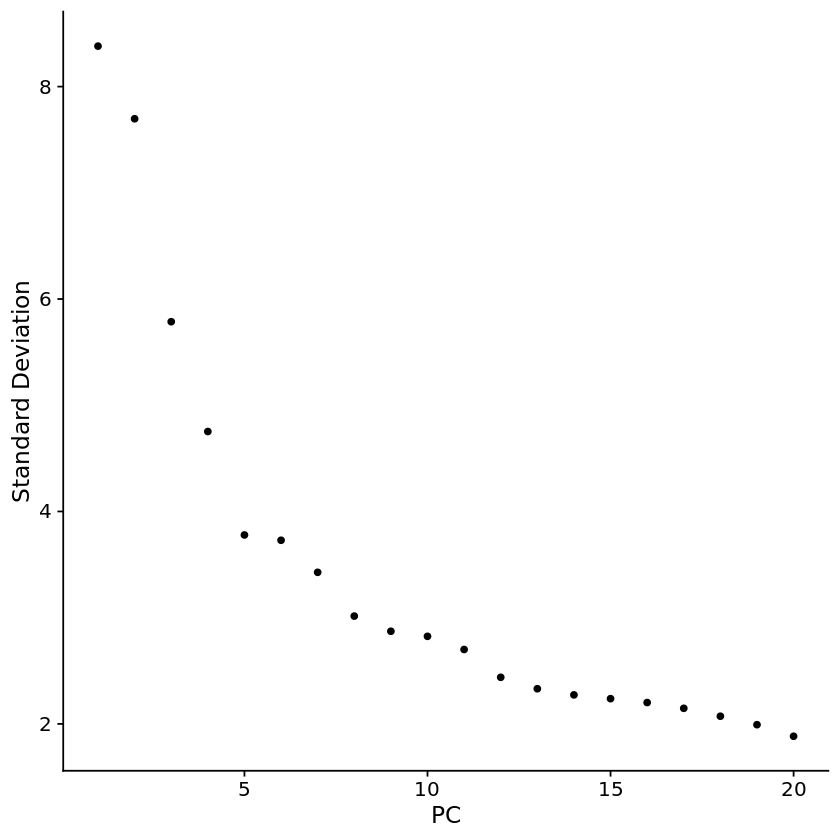

In [123]:
ge_so <- NormalizeData(ge_so, normalization.method = "LogNormalize",scale.factor = 10000, verbose = F)
ge_so <- FindVariableFeatures(object = ge_so,selection.method = "vst", nfeatures = 2000, verbose = F)
ge_so <- ScaleData(ge_so, features = rownames(ge_so))
ge_so <- RunPCA(ge_so, features = VariableFeatures(object = ge_so), verbose = F)
ElbowPlot(ge_so)

Warning message:
"The following arguments are not used: n_neighbors"
Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
23:08:02 UMAP embedding parameters a = 1.929 b = 0.7915

23:08:02 Read 78886 rows and found 20 numeric columns

23:08:02 Using Annoy for neighbor search, n_neighbors = 30

23:08:02 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

23:08:13 Writing NN index file to temp file /tmp/RtmpGF5s4p/file55c41ddfd719

23:08:13 Searching Annoy index using 1 thread, search_k = 3000

23:08:44 Annoy recall = 100%

23:08:47 Commencing smo

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 78886
Number of edges: 2721372

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9254
Number of communities: 38
Elapsed time: 30 seconds


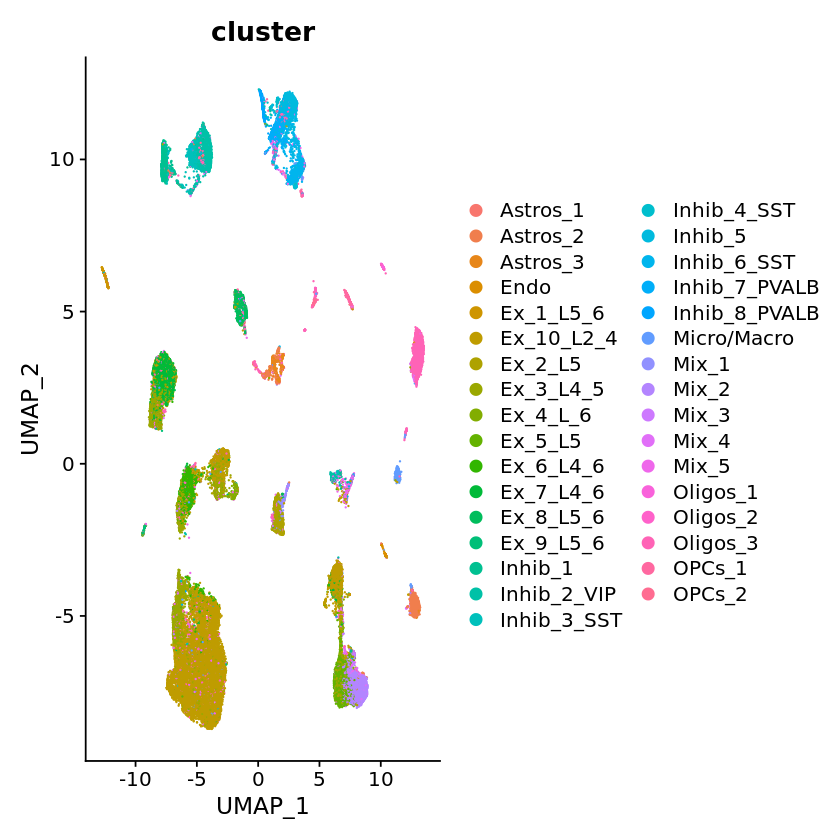

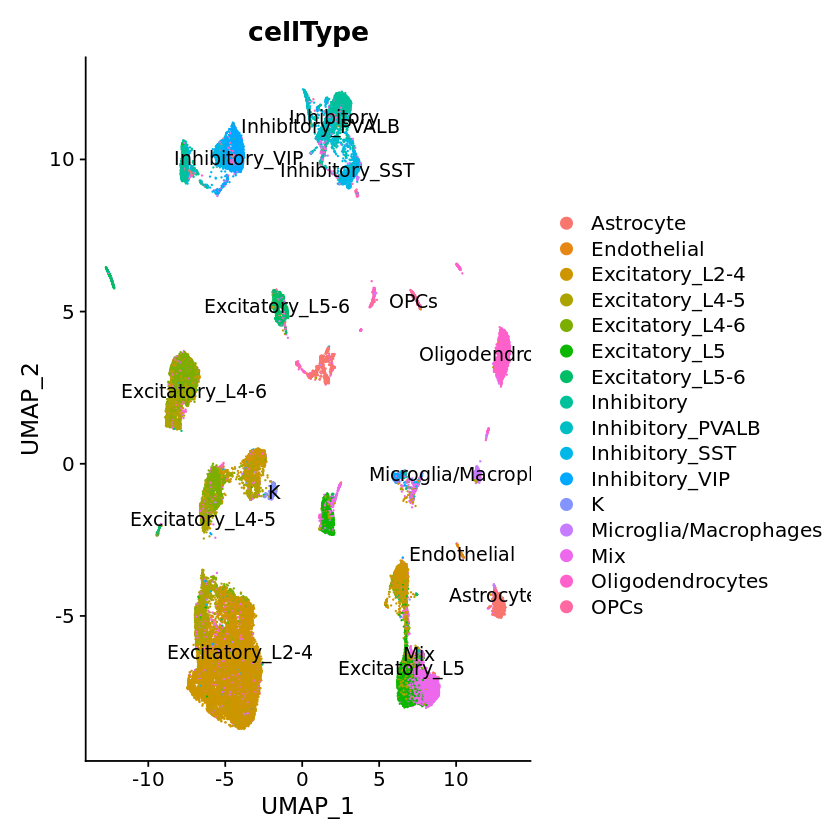

In [124]:
ge_so <- RunUMAP(ge_so , dims = 1:20, min.dist = 0.001,  n_neighbors = 50)    ##parameteres need to be set
ge_so <- FindNeighbors(ge_so, dims = 1:20)
#find cluster
ge_so <- FindClusters(ge_so, resolution =1)
DimPlot(ge_so, reduction='umap', group.by='cluster')
DimPlot(ge_so, reduction='umap', group.by='cellType', label = T)

In [125]:
## Ok I think I will pool everything together and assign the labels manually :/ 

In [126]:
last_info

,cellname,batch,batchCond,cluster,barcode,cellType
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Ex_10_L2_4.3_Control_B3_AAACCTGAGGTAGCCA,Ex_10_L2_4.3_Control_B3_AAACCTGAGGTAGCCA,B3,Control,Ex_10_L2_4,AAACCTGAGGTAGCCA,Excitatory_L2-4
Inhib_5.3_Control_B3_AAACCTGCAAACTGTC,Inhib_5.3_Control_B3_AAACCTGCAAACTGTC,B3,Control,Inhib_5,AAACCTGCAAACTGTC,Inhibitory
Ex_10_L2_4.3_Control_B3_AAACCTGCAACAACCT,Ex_10_L2_4.3_Control_B3_AAACCTGCAACAACCT,B3,Control,Ex_10_L2_4,AAACCTGCAACAACCT,Excitatory_L2-4
Ex_8_L5_6.3_Control_B3_AAACCTGGTCCGAACC,Ex_8_L5_6.3_Control_B3_AAACCTGGTCCGAACC,B3,Control,Ex_8_L5_6,AAACCTGGTCCGAACC,Excitatory_L5-6
Inhib_2_VIP.3_Control_B3_AAACCTGGTCGTGGCT,Inhib_2_VIP.3_Control_B3_AAACCTGGTCGTGGCT,B3,Control,Inhib_2_VIP,AAACCTGGTCGTGGCT,Inhibitory_VIP
Mix_2.3_Control_B3_AAACGGGAGGAACTGC,Mix_2.3_Control_B3_AAACGGGAGGAACTGC,B3,Control,Mix_2,AAACGGGAGGAACTGC,Mix
Oligos_3.3_Control_B3_AAACGGGAGTGGTAGC,Oligos_3.3_Control_B3_AAACGGGAGTGGTAGC,B3,Control,Oligos_3,AAACGGGAGTGGTAGC,Oligodendrocytes
Ex_7_L4_6.3_Control_B3_AAACGGGAGTGTGAAT,Ex_7_L4_6.3_Control_B3_AAACGGGAGTGTGAAT,B3,Control,Ex_7_L4_6,AAACGGGAGTGTGAAT,Excitatory_L4-6
Astros_3.3_Control_B3_AAACGGGCATCCAACA,Astros_3.3_Control_B3_AAACGGGCATCCAACA,B3,Control,Astros_3,AAACGGGCATCCAACA,Astrocyte


In [ ]:
last_info['sample_id'] = 'k'

In [133]:
# 
for (i in 1:nrow(last_info)){
    str <- as.character(last_info[i,'cellname'])
    str_sp <- str_split(str, "\\.", n = Inf, simplify = T)
    tmp_sample <- str_sp[[2]]
    tmps <- str_split(tmp_sample,"_",n=Inf, simplify = T)
    last_info[i,'sample_id'] = tmps[[1]]
}
last_info

,cellname,batch,batchCond,cluster,barcode,cellType,sample_id
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Ex_10_L2_4.3_Control_B3_AAACCTGAGGTAGCCA,Ex_10_L2_4.3_Control_B3_AAACCTGAGGTAGCCA,B3,Control,Ex_10_L2_4,AAACCTGAGGTAGCCA,Excitatory_L2-4,3
Inhib_5.3_Control_B3_AAACCTGCAAACTGTC,Inhib_5.3_Control_B3_AAACCTGCAAACTGTC,B3,Control,Inhib_5,AAACCTGCAAACTGTC,Inhibitory,3
Ex_10_L2_4.3_Control_B3_AAACCTGCAACAACCT,Ex_10_L2_4.3_Control_B3_AAACCTGCAACAACCT,B3,Control,Ex_10_L2_4,AAACCTGCAACAACCT,Excitatory_L2-4,3
Ex_8_L5_6.3_Control_B3_AAACCTGGTCCGAACC,Ex_8_L5_6.3_Control_B3_AAACCTGGTCCGAACC,B3,Control,Ex_8_L5_6,AAACCTGGTCCGAACC,Excitatory_L5-6,3
Inhib_2_VIP.3_Control_B3_AAACCTGGTCGTGGCT,Inhib_2_VIP.3_Control_B3_AAACCTGGTCGTGGCT,B3,Control,Inhib_2_VIP,AAACCTGGTCGTGGCT,Inhibitory_VIP,3
Mix_2.3_Control_B3_AAACGGGAGGAACTGC,Mix_2.3_Control_B3_AAACGGGAGGAACTGC,B3,Control,Mix_2,AAACGGGAGGAACTGC,Mix,3
Oligos_3.3_Control_B3_AAACGGGAGTGGTAGC,Oligos_3.3_Control_B3_AAACGGGAGTGGTAGC,B3,Control,Oligos_3,AAACGGGAGTGGTAGC,Oligodendrocytes,3
Ex_7_L4_6.3_Control_B3_AAACGGGAGTGTGAAT,Ex_7_L4_6.3_Control_B3_AAACGGGAGTGTGAAT,B3,Control,Ex_7_L4_6,AAACGGGAGTGTGAAT,Excitatory_L4-6,3
Astros_3.3_Control_B3_AAACGGGCATCCAACA,Astros_3.3_Control_B3_AAACGGGCATCCAACA,B3,Control,Astros_3,AAACGGGCATCCAACA,Astrocyte,3


In [134]:
table(last_info$sample_id)


   1   10   11   12   13   14   15   16   17   18   19    2   20   21   22   23 
3267 2511 3757 2511 2433 1758 3523 1239 3227 1688 2630 1795 3491 1953 2144 3007 
  24   25   26   27   28   29    3   30   31   32   33   34    4    5    6    7 
1061  212 2196 1387 2825 2461 1363 2690 3288 2523 2077 3228 2423 1661 2275 2487 
   8    9 
2561 1234 

In [135]:
ge_so <- AddMetaData(ge_so, metadata = last_info)

In [136]:
## now subset the control cells
ge_so_control <- subset(ge_so, subset=batchCond=='Control')
table(ge_so_control$sample_id)


  12   13   15   16   19    2   20   21   22   24   25   27   29    3   31    7 
2511 2433 3523 1239 2630 1795 3491 1953 2144 1061  212 1387 2461 1363 3288 2487 
   9 
1234 

In [143]:
ge_so_control <- RunPCA(ge_so_control, features = VariableFeatures(object = ge_so_control), verbose = F)
ge_so_control <- RunUMAP(ge_so_control , dims = 1:20, min.dist = 0.001,  n_neighbors = 50, verbose=F)    ##parameteres need to be set
ge_so_control <- FindNeighbors(ge_so_control, dims = 1:20, verbose=F)
#find cluster
ge_so_control <- FindClusters(ge_so_control, resolution =1, verbose=F)

Warning message:
"The following arguments are not used: n_neighbors"


png 
  2

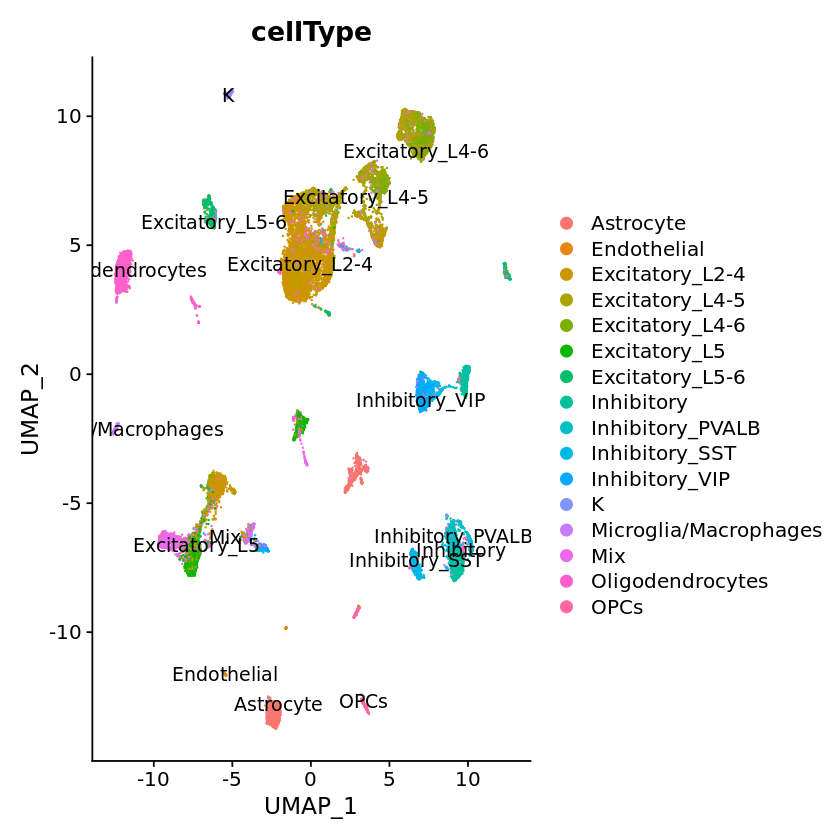

In [147]:
DimPlot(ge_so_control, reduction='umap', group.by='cellType', label=T)
results_root <- '/data/APAproject/post_qual/data/Nagy_mdd/results/'
plotname <- paste0(results_root, 'Nagy_control_map_metadata_added.pdf')
pdf(file=plotname, width = 8.27, height = 11.69, paper='A4r', onefile=T)
DimPlot(ge_so_control, reduction='umap', group.by='cellType', label=T)
dev.off()

In [150]:
ge_so_control$cluster <- ge_so_control$cellType
ge_so_control$cellType <- paste0('Nagy_',ge_so_control$cellType)

In [151]:
saveRDS(ge_so_control, file='rdata/ge_so_control_Nagy.rds')

In [9]:
ge_so_control <- readRDS('rdata/ge_so_control_Nagy.rds')

In [18]:
tmp_df <- data.frame(sampleID = ge_so_control$sample_id,
                     barcodes=paste0(ge_so_control$barcode,'-1'),
                    new_cellnames=paste0(ge_so_control$barcode,'-s',ge_so_control$sample_id))
tmp_df

,sampleID,barcodes,new_cellnames
,<chr>,<chr>,<chr>
Ex_10_L2_4.3_Control_B3_AAACCTGAGGTAGCCA,3,AAACCTGAGGTAGCCA-1,AAACCTGAGGTAGCCA-s3
Inhib_5.3_Control_B3_AAACCTGCAAACTGTC,3,AAACCTGCAAACTGTC-1,AAACCTGCAAACTGTC-s3
Ex_10_L2_4.3_Control_B3_AAACCTGCAACAACCT,3,AAACCTGCAACAACCT-1,AAACCTGCAACAACCT-s3
Ex_8_L5_6.3_Control_B3_AAACCTGGTCCGAACC,3,AAACCTGGTCCGAACC-1,AAACCTGGTCCGAACC-s3
Inhib_2_VIP.3_Control_B3_AAACCTGGTCGTGGCT,3,AAACCTGGTCGTGGCT-1,AAACCTGGTCGTGGCT-s3
Mix_2.3_Control_B3_AAACGGGAGGAACTGC,3,AAACGGGAGGAACTGC-1,AAACGGGAGGAACTGC-s3
Oligos_3.3_Control_B3_AAACGGGAGTGGTAGC,3,AAACGGGAGTGGTAGC-1,AAACGGGAGTGGTAGC-s3
Ex_7_L4_6.3_Control_B3_AAACGGGAGTGTGAAT,3,AAACGGGAGTGTGAAT-1,AAACGGGAGTGTGAAT-s3
Astros_3.3_Control_B3_AAACGGGCATCCAACA,3,AAACGGGCATCCAACA-1,AAACGGGCATCCAACA-s3


In [19]:
## rename the cellnames in the ge_so for conveniece in downstream analysis
ge_so_control <- RenameCells(ge_so_control, new.names = tmp_df$new_cellnames)
Cells(ge_so_control)[10]

[1] "AAACGGGGTATTCGTG-s3"

In [22]:
### save the QCed barcodes for filtering the bamfiles for peak calling
for (sample in unique(ge_so_control$sample_id)){
    tmp <- tmp_df[tmp_df$sampleID==sample,]
    tmp <- tmp['barcodes']
    write.table(tmp, file=paste0('raw_data/bamfiles_in/sample_barcodes',sample,'.tsv'),
                row.names = F, col.names = F, quote=F)
}

In [24]:
table(ge_so_control$sample_id)


  12   13   15   16   19    2   20   21   22   24   25   27   29    3   31    7 
2511 2433 3523 1239 2630 1795 3491 1953 2144 1061  212 1387 2461 1363 3288 2487 
   9 
1234 

In [29]:
ge_so_control <- subset(ge_so_control, subset= sample_id %in% c('12','13','15','16','19','2','20',
                                                               '21','22','27','29','3','31','7','9'))
ge_so_control

An object of class Seurat 
30062 features across 33939 samples within 1 assay 
Active assay: RNA (30062 features, 2000 variable features)
 2 dimensional reductions calculated: pca, umap

In [30]:
saveRDS(ge_so_control, file='rdata/ge_so_control_Nagy.rds') 

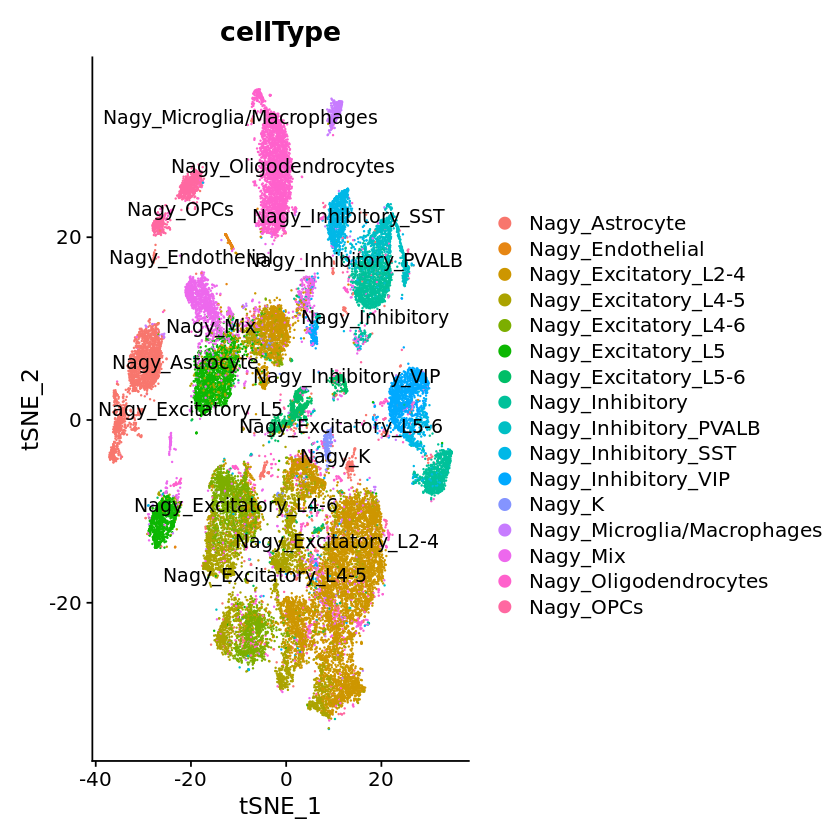

In [32]:
ge_so_control <- RunTSNE(ge_so_control, dims = 1:20, perplexity=200)
DimPlot(ge_so_control, reduction = 'tsne', group.by='cellType',label=T, repel=T)

# next chapter, Nov 17 2021

In [2]:
ge_so <- readRDS('rdata/ge_so_control_Nagy.rds')
ge_so

An object of class Seurat 
30062 features across 33939 samples within 1 assay 
Active assay: RNA (30062 features, 2000 variable features)
 2 dimensional reductions calculated: pca, umap

[1] FALSE

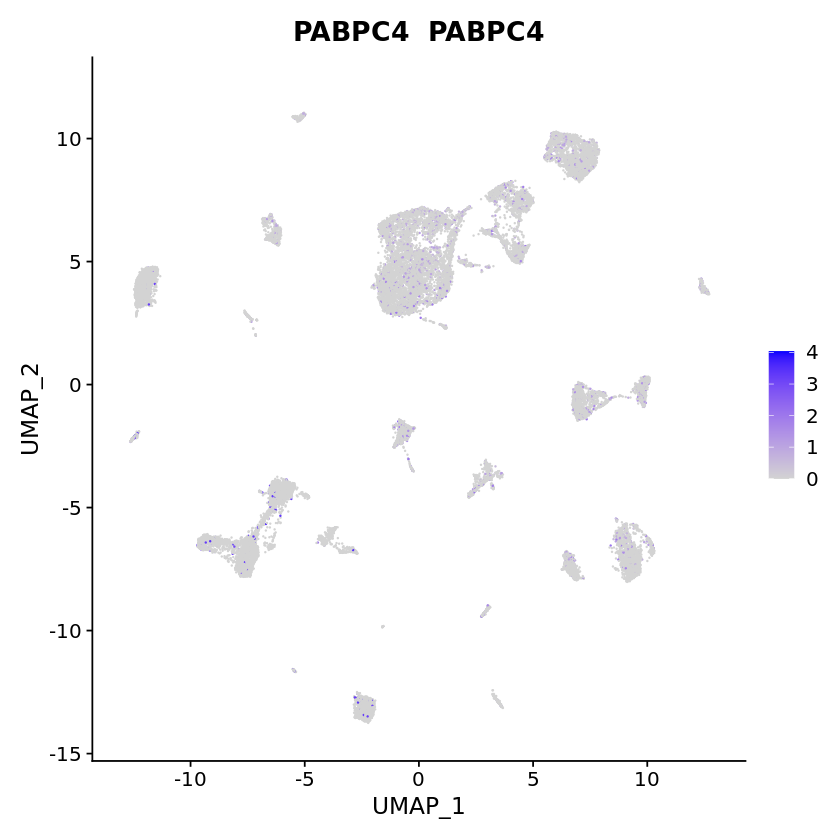

In [16]:
FeaturePlot(ge_so, features = 'PABPC4  PABPC4')
'PABPC4' %in% rownames(ge_so)

In [11]:
rownames(ge_so)[10]

[1] "RP5-857K21.4  RP5-857K21.4"